## What is t-SNE?
t-Distributed Stochastic Neighbor Embedding (t-SNE) is an unsupervised, non-linear technique developed by Laurens van der Maaten and Geoffrey Hinton in 2008.

## t-SNE vs PCA

Once a dataset’s dimensionality has been reduced using one of the available algorithms, it is almost always impossible to perfectly reverse the operation, because some information gets lost during dimensionality reduction. Moreover, while some algorithms (such as PCA) have a simple reverse transformation procedure that can reconstruct a dataset relatively similar to the original, other algorithms (such as T-SNE) do not.

#### The algorithm has two steps:

We initially construct a probability distribution in such a way that objects with a higher similarity have a higher probability to be grouped together than objects with lower probability. This is done over pairs of higher-dimensional objects.

We then construct a similar probability distribution over the lower-dimensional map so that the [Kullback–Leibler divergence](https://en.wikipedia.org/wiki/Kullback%E2%80%93Leibler_divergence) between the two distributions, with respect to their location on the map, is minimized.

Usually, the algorithm uses Euclidean distance as the base metric but it can be changed to fit the use of the programmer. These t-SNE clusters are dependent on chosen parameters and sometimes may show a cluster in non-clustered data. However, t-SNE is able to recover well-
separated clusters when the correct parameters are chosen.

Maaten and Hinton proposed the t-distributed SNE (t-SNE) in which the joint distribution of two samples, zn and zm , in low-dimensional space is modeled by a Student’s t-distribution:


![img](https://i.imgur.com/ihkO2Iu.png)

In above **ν** means the degree of freedom. t-SNE can alleviate the crowding problem in SNE.

## Now implementing t-SNE with scikit-learn's built-in function

In [73]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

train_df_org = pd.read_csv('kaggle/input/digit-recognizer/train.csv',  nrows=1000)
test_df_org = pd.read_csv('kaggle/input/digit-recognizer/test.csv',  nrows=1000)

train_df_for_tsne = StandardScaler().fit_transform(train_df_org)
train_df_org_label = train_df_org['label']


train_df_org.head()

label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0  
1         0         0         0         0  
2         0         0         0         0  
3         0         0         0         0  
4         0         0         0         0  

[5 rows x 785 columns]

In [74]:
test_df_org.head()

pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   

   pixel9  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0  
1         0         0         0         0  
2         0         0         0         0  
3         0         0         0         0  
4         0         0         0         0  

[5 rows x 784 columns]

In [75]:
tsne = TSNE(n_components=2, random_state=0)
mnist_tsne = tsne.fit_transform(train_df_for_tsne)

mnist_tsne_1 = np.vstack((mnist_tsne.T, train_df_org_label)).T
tsne_df = pd.DataFrame(data=mnist_tsne_1, columns=('Dim_1', 'Dim_2', 'Label'))

tsne_df.head()

Dim_1      Dim_2  Label
0   3.193196  -1.728171    1.0
1 -42.094837  17.451714    0.0
2  18.940496  10.338684    1.0
3   5.413895 -30.402338    4.0
4 -45.575104  18.657940    0.0

/home/paul/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:316: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



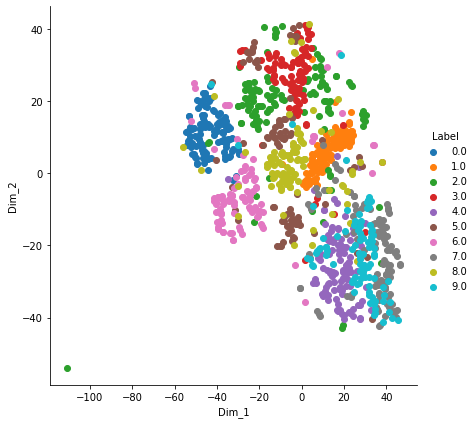

In [76]:
sns.FacetGrid(tsne_df, hue='Label', size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()

## Now will implement the same t-sne graph in a slightly different way

Below code is from - https://www.kaggle.com/subinium/dimension-reduction-3-t-sne
This produces a better looking color graph
But it super-SLOW, never ran in my local JupyterLab
Also in Kaggle it took more than 1 hour to run

In [77]:

import plotly.graph_objects as go
plt.rcParams['image.cmap'] = 'gray'

color = ['#6388b4', '#ffae34', '#ef6f6a', '#8cc2ca', '#55ad89', '#c3bc3f', '#bb7693', '#baa094', '#a9b5ae', '#767676']

mnist_df_without_label = train_df_org.drop(['label'], axis=1)
mnist_tsne_2 = tsne.fit_transform(mnist_df_without_label, train_df_org_label)

fig = go.Figure()

for idx in range(10):
    fig.add_trace(go.Scatter(
        x = mnist_tsne_2[:, 0][train_df_org_label==idx],
        y = mnist_tsne_2[:, 1][train_df_org_label == idx],
        name=str(idx),
        opacity=0.6,
        mode='markers',
        marker=dict(color=color[idx])
    ))

fig.update_layout(
    width=800,
    height=800,
    title='T-SNE on MNIST',
    yaxis = dict(
        scaleanchor = 'x',
        scaleratio = 1
    ),
    legend=dict(
        orientation='h',
        yanchor='bottom',
        y=1.02,
        xanchor='right',
        x=1
    )
)

fig.show()